In [1]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow_docs.vis import embed
import numpy as np
import cv2
import pandas as pd
import platform
from matplotlib import pyplot as plt

2024-07-09 18:55:41.101928: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-09 18:55:41.126735: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-09 18:55:41.126769: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-09 18:55:41.139980: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-09 18:55:41.974274: W tensorflow/compiler/tf

In [2]:
data_directory = '../human_pose_local/archive/Human Action Recognition'

In [21]:
image_path = data_directory + '/train/Image_12599.jpg'
# image_path = '../lime.jpg'

# Load the image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [22]:
new_width = 224
new_height = 224
dimensions = (new_width, new_height)

# Resize the image
resized_image = cv2.resize(img, dimensions, interpolation=cv2.INTER_LINEAR)

In [23]:
model = tf.keras.applications.MobileNetV3Large(weights='imagenet', include_preprocessing=True)

In [24]:
prediction = model.predict(np.expand_dims(resized_image, axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [25]:
from keras.applications.mobilenet_v3 import decode_predictions

for desc in decode_predictions(prediction)[0]:
    print(desc)

    #print('- {} ({:.2f}%)'.format(desc, 100 * score))

('n02777292', 'balance_beam', 0.15199172)
('n03623198', 'knee_pad', 0.068358354)
('n04023962', 'punching_bag', 0.059058633)
('n03630383', 'lab_coat', 0.04262727)
('n03481172', 'hammer', 0.040308148)


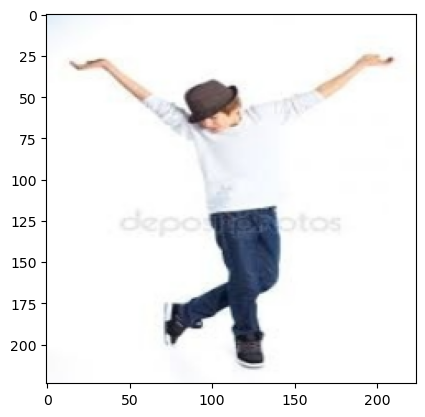

In [26]:
plt.imshow(resized_image)